In [1]:
"""
Normal distribution. 
Using histograms with and without cumulative option observe how increasing variance and mean changes look of the distribution. 
Check how number of bins influences the plots. 
Consider what would make normal distribution weekly informative and what will make it informative
"""
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
normal_dist_dict = {
    "normal":      np.random.normal(size=10000),                    # Informative 
    "normal_5_5":  np.random.normal(loc=5.0,scale=5.0,size=10000),   # Informative 
    "normal_5_50": np.random.normal(loc=0.0,scale=50.0,size=10000) # Weekly informative 
}

df = pd.DataFrame.from_dict(normal_dist_dict)
df.head()


,normal,normal_5_5,normal_5_50
0,0.900478,6.168586,-4.625814
1,-0.762217,2.625001,-35.593471
2,0.127067,3.166585,-24.754698
3,-1.254936,1.437875,37.820255
4,0.154431,10.268217,-108.694095


In [3]:
melted_df = df.melt()

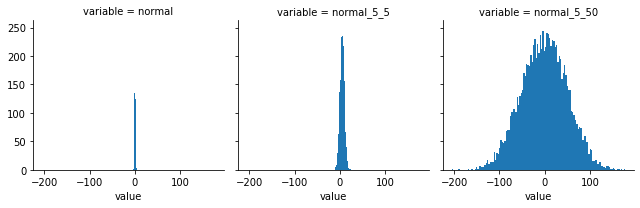

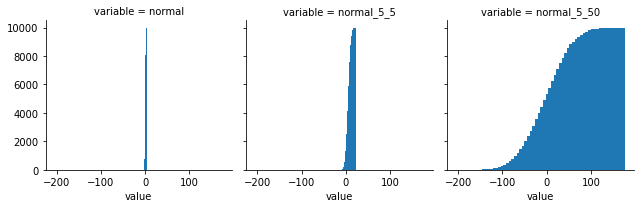

In [4]:
# Maps a dataset onto multiple axes 
Graph = sns.FacetGrid(melted_df, col="variable", sharex=True)
Graph.map(plt.hist,"value",cumulative=False,bins=128)
GraphCum = sns.FacetGrid(melted_df, col="variable", sharex=True)
GraphCum.map(plt.hist,"value", cumulative=True,bins=64)

- the lower value of variance, the less informative data
- mean moves data along x axis
- bins reflects how tightly the bars are allignied

In [5]:
"""
Transform samples from normal distribution with inverse logit. 
Consider how mean and standard deviation influence the shape of histogram and cdf. 
Is previously non-informative normal is still non-informative after transformation?
"""
from scipy.special import expit
expit_df = expit(df)
melted_expit_df = expit_df.melt()

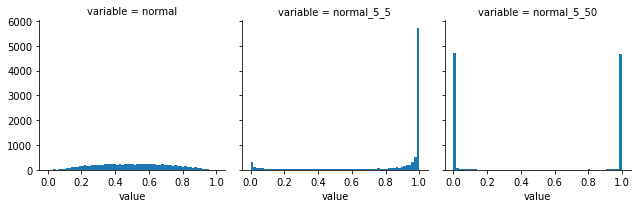

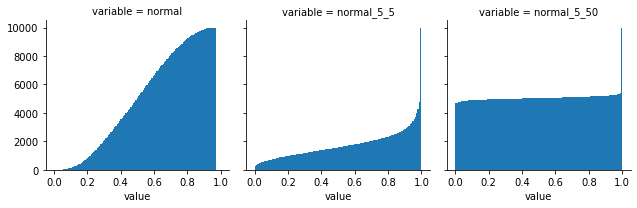

In [6]:
GraphExpit = sns.FacetGrid(melted_expit_df, col="variable", sharex=True, col_wrap=3)
GraphExpit.map(plt.hist, "value", cumulative=False, bins=64)
GraphExpitCum = sns.FacetGrid(melted_expit_df, col="variable", sharex=True, col_wrap=3)
GraphExpitCum.map(plt.hist, "value", cumulative=True, bins=128)

The inverse logit is defined by $$\frac{exp(x)}{(1+exp(x))}$$

Argument x in range(-Inf;Inf) transforms logits to range (0; 1) respectively.

Observation: Conversion of weekly informative normal distribution to inverse logit distribution doesn't change its characteristic.


In [7]:
"""
Poisson distribution. 
This distribution returns integers (give histogram location of bins instead of their numbers), depending on intensity. 
This is a good distribution for modelling countable effects. 
Observe how mean and variance influence the shape.
"""

poisson_dict={
    "Poisson_Interval=2":  np.random.poisson(2,100000),
    "Poisson_Interval=4":  np.random.poisson(4,100000),
    "Poisson_Interval=8":  np.random.poisson(8,100000),
    "Poisson_Interval=16": np.random.poisson(16,100000)  
}

In [8]:
poisson_df = pd.DataFrame.from_dict(poisson_dict)
poisson_melted = poisson_df.melt()

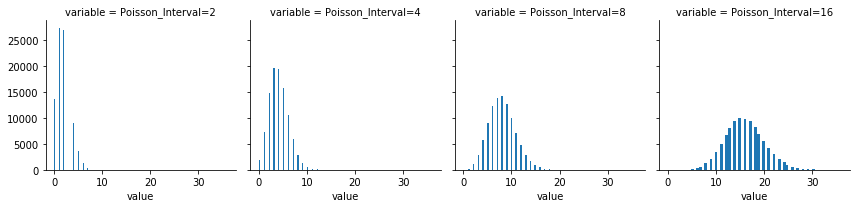

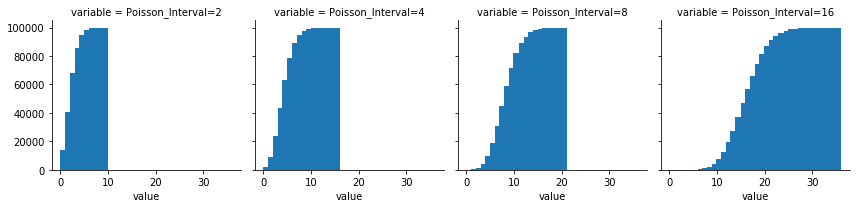

In [9]:
Graph_Poisson = sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=4)
Graph_Poisson.map(plt.hist, "value", cumulative=False, bins=64)
Graph_Poisson_Cum = sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=4)
Graph_Poisson_Cum.map(plt.hist, "value", cumulative=True, bins=128)

The poisson distriution has a standard deviation $\sqrt{\lambda}$. The $\lambda$ is an expected value. The spread increases with the increase of expected value.

In [10]:
"""
Beta distribution. 
This is a distribution defined on [0,1] interval. 
It is useful as a prior for probability parameters (like binomial distribution). 
Traditionally it is defined with $\alpha$ and $\beta$ parameters. 
There are however different reparametrizations possible. 
Verify how beta distributions behave for their natural parametrization, location dispersion parametrization and mean-population size parametrization (see lecture notes)
"""

beta_dict={
    "Beta_alpha=0.9_beta=0.9":  np.random.beta(0.9, 0.9, 10000), #alpha<1, beta<1
    "Beta_alpha=0.9_beta=2": np.random.beta(0.9,2, 10000), #alpha<1, beta>1
    "Beta_alpha=2_beta=0.9": np.random.beta(2, 0.9,10000), #alpha>1, beta<1
    "Beta_alpha=2_beta=2":np.random.beta(2,2,10000) #alpha>1, beta>1
}

In [11]:
beta_df = pd.DataFrame.from_dict(beta_dict)
beta_melted = beta_df.melt()

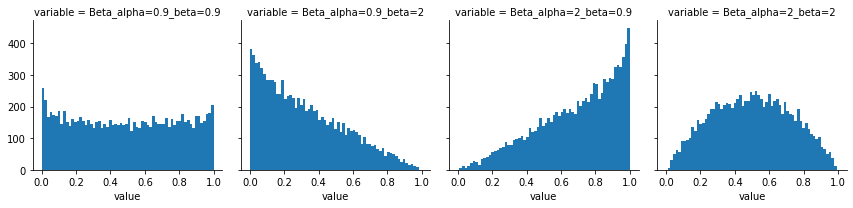

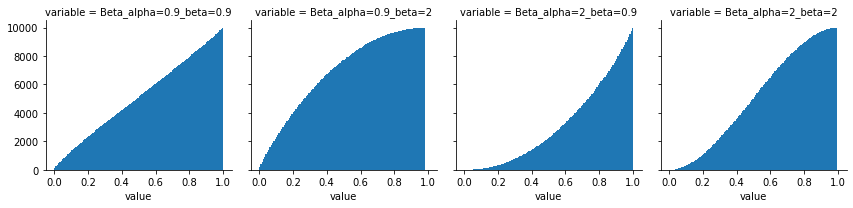

In [12]:
Graph_Beta = sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=4)
Graph_Beta.map(plt.hist, "value", cumulative=False, bins=64)
Graph_Beta_Cum = sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=4)
Graph_Beta_Cum.map(plt.hist, "value", cumulative=True, bins=128)

-  $\alpha$ > 1 and $\beta$ < 1 - the entire probability density function will concentrate against the upper boundary
-  $\alpha$ < 1 and $\beta$ > 1 - the entire probability density function will concentrate against the lower boundary
-  $\alpha$ < 1 and $\beta$ < 1 - the probability density function will concentrate against both boundaries
-  $\alpha$ > 1 and $\beta$ > 1 - the probability density function will concentrate in the interior of the interval

In [13]:
"""
Log-normal distribution. 
This is a great distributions for positive variables, especially if scale can differ (for example salaries). 
Assumtion is that the logarithm of variable of interest is normaly distributed. 
Observe how mean and variance of normal distribution are propagating through transformation.
"""

lognormal_dict={
    "Lognormal_M=5_S=5":     np.random.lognormal(5, 5,   10000),
    "Lognormal_M=5_S=50":     np.random.lognormal(5, 50,   10000),
    "Lognormal_M=0_S=1":       np.random.lognormal(size=10000)
}

In [14]:
lognormal_df = pd.DataFrame.from_dict(lognormal_dict)
lognormal_melted = lognormal_df.melt()

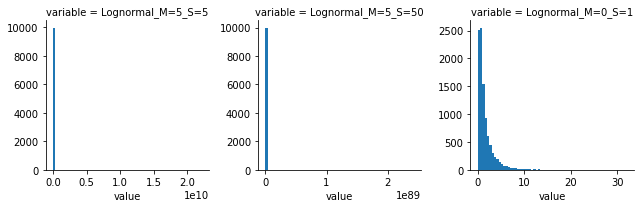

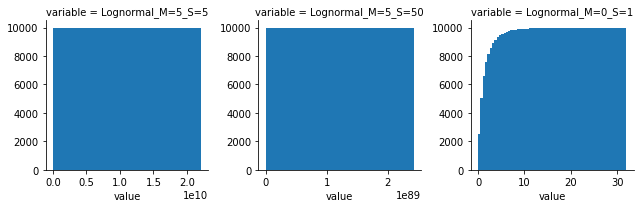

In [15]:
Graph_Lognormal = sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=3)
Graph_Lognormal.map(plt.hist, "value", cumulative=False, bins=64)
Graph_Lognormal_Cum = sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=3)
Graph_Lognormal_Cum.map(plt.hist, "value", cumulative=True, bins=64)

- Log normal distribution transforms domain to positive real value only. 
- Variance skewing the log normal probability density function and filling out the tail. 
- Mean of the log normal grows with variance – the larger variance the more the mean will be pulled up by the heavy upper tail.